In [1]:
import pickle

import numpy as np
import seaborn as sns
import pandas as pd
from pylab import rcParams

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.set_style("white")

In [2]:
class Message:
    '''Class to keep sender, timestamp, public (To/Cc) and hidden (Bcc) recipients of a message
    
    Must map the Message class fields in parseMaildir.py for deserialization purposes
    '''
    def __init__(self, From, mtime, To, Cc, Bcc):
        self.From = From
        self.mtime = mtime
        self.To = To
        self.Cc = Cc
        self.Bcc = Bcc

In [3]:
parsed_logs_folder = 'Enron/parsing/'
social_graph = pickle.load(open(parsed_logs_folder + "social.pkl", "rb"))
emails_per_num_of_recipients = pickle.load(open(parsed_logs_folder + "recipients.pkl", "rb"))
log = pickle.load(open(parsed_logs_folder + "replay_log.pkl", "rb"))
email_status = pickle.load(open(parsed_logs_folder + "email_status.pkl", "rb"))

enc_status = {0: "plaintext", 1: "stale", 2: "encrypted"}

In [4]:
userset = set()

for user in social_graph.keys():
        userset.add(user)

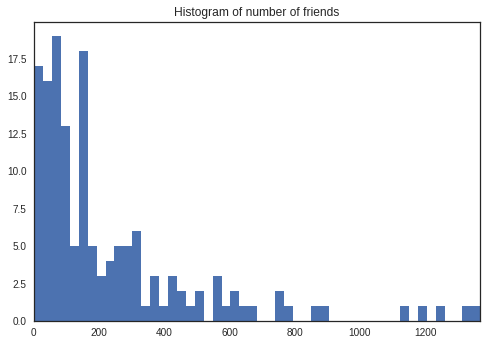

In [5]:
data = [info["num_of_friends"] for info in social_graph.values()]
plt.hist(data, bins=50)
plt.xlim(0, max(data))
plt.title("Histogram of number of friends")
plt.show()

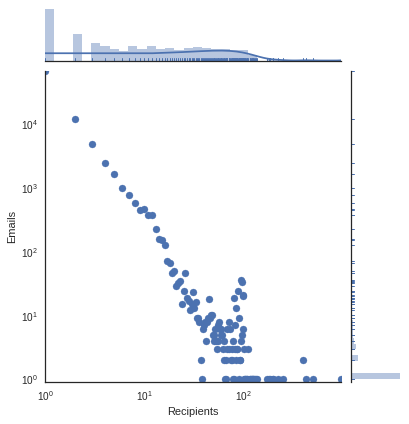

In [6]:
x, y = zip(*sorted(emails_per_num_of_recipients.items(), key=lambda t: t[0]))
data = pd.DataFrame({'Recipients': x, 'Emails': y})

logbins=np.logspace(0,np.log(10000), 100)

g = sns.JointGrid('Recipients', 'Emails', data,xlim=[1, max(data['Recipients'])],ylim=[0.9, max(data['Emails'])])
g.plot_joint(plt.scatter)
g.plot_marginals(sns.distplot, rug=True, bins=logbins)

ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')
plt.show()

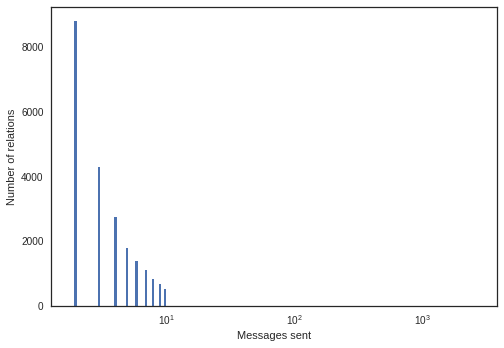

In [7]:
comm_links = {}

for email in log:
    recipients = email.To | email.Cc | email.Bcc - {email.From}
    
    for recipient in recipients:
        if recipient not in userset and email.From not in userset:
            continue
        sorted_actors = sorted([email.From, recipient])
        if (sorted_actors[0], sorted_actors[1]) not in comm_links:
            comm_links[(sorted_actors[0], sorted_actors[1])] = 1
        else: 
            comm_links[(sorted_actors[0], sorted_actors[1])] += 1

data = [num_of_msgs for num_of_msgs in comm_links.values()]
plt.gca().set_xscale("log")
plt.hist(data, bins=np.logspace(0.1, 1.0, 50))
plt.xlim(0, max(data))
plt.xlabel("Messages sent")
plt.ylabel("Number of relations")

plt.show()

2800 92 8 0
177500 91 9 0
179300 91 9 0
183000 94 6 0
201000 91 9 0
202400 92 8 0
202600 92 8 0
203000 91 9 0
205200 92 8 0
213600 91 9 0
215300 91 9 0
215400 100 0 0
215500 95 5 0
215600 91 9 0
216800 91 9 0
217300 98 2 0
217400 92 8 0
217500 91 9 0
223000 92 8 0
223200 91 9 0
224000 91 9 0
226700 91 9 0
226900 91 9 0
229700 92 8 0
229800 93 7 0
229900 97 3 0
232000 98 2 0
232100 98 2 0
232200 100 0 0
232300 100 0 0
232400 100 0 0
232500 99 1 0
232600 98 2 0
232700 99 1 0
232900 97 3 0
233000 100 0 0
234200 93 7 0
237600 96 4 0


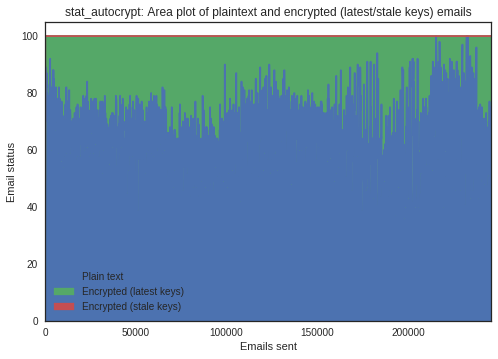

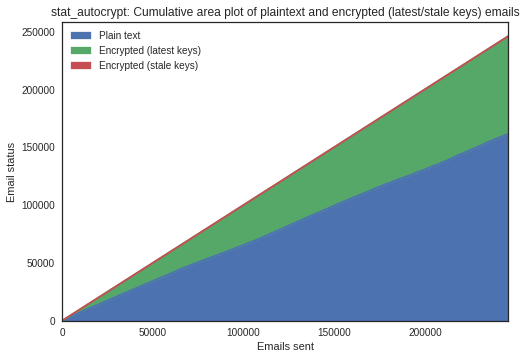

215400 98 2 0
215500 95 5 0
217300 94 6 0
217400 91 9 0
226900 91 9 0
229800 91 9 0
229900 93 7 0
232000 97 3 0
232100 98 2 0
232200 100 0 0
232300 100 0 0
232400 100 0 0
232500 98 2 0
232600 98 2 0
232700 99 1 0
232900 97 3 0
233000 100 0 0
237600 91 9 0


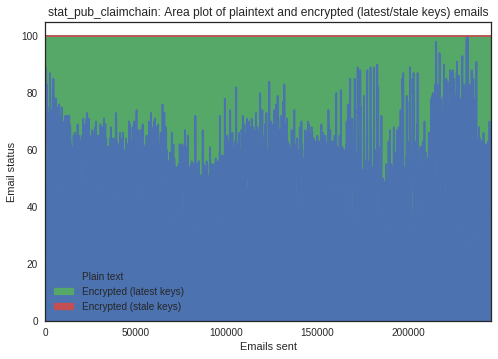

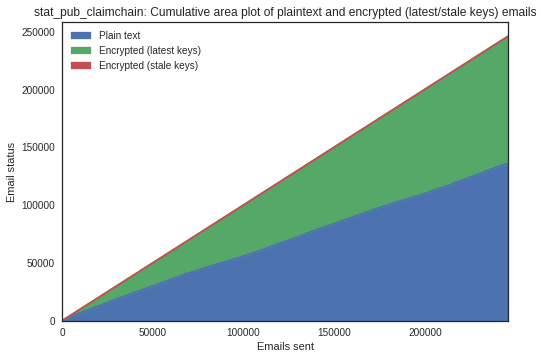

183000 92 8 0
202400 91 9 0
202600 92 8 0
205200 91 9 0
215400 99 1 0
215500 95 5 0
215600 91 9 0
217300 97 3 0
217400 92 8 0
223000 91 9 0
226700 91 9 0
226900 91 9 0
229700 92 8 0
229800 92 8 0
229900 95 5 0
232000 97 3 0
232100 98 2 0
232200 100 0 0
232300 100 0 0
232400 100 0 0
232500 99 1 0
232600 98 2 0
232700 99 1 0
232900 97 3 0
233000 100 0 0
237600 94 6 0


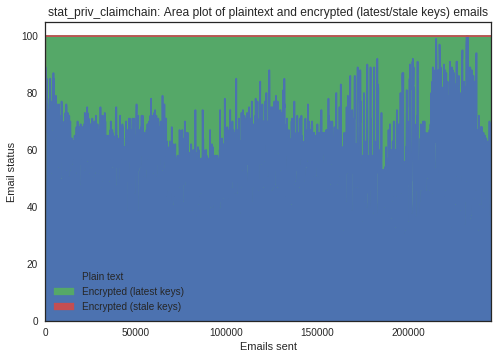

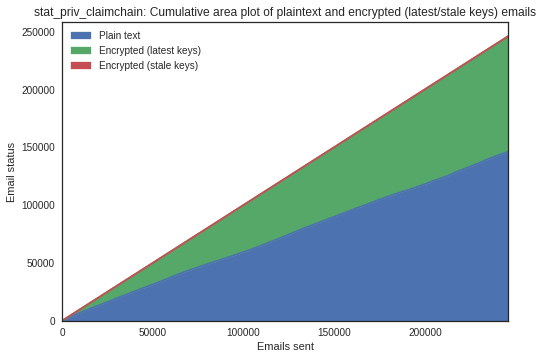

2800 92 8 0
183000 94 4 2
202400 92 6 2
202600 92 8 0
205200 92 7 1
215400 99 1 0
215500 94 5 1
217300 97 1 2
217400 91 9 0
223000 91 8 1
223200 91 8 1
224000 91 7 2
226900 91 6 3
229700 91 9 0
229800 92 4 4
229900 96 3 1
232000 98 2 0
232100 98 2 0
232200 100 0 0
232300 100 0 0
232400 100 0 0
232500 99 1 0
232600 98 2 0
232700 99 1 0
232900 96 4 0
233000 100 0 0
234200 93 5 2
237600 96 3 1


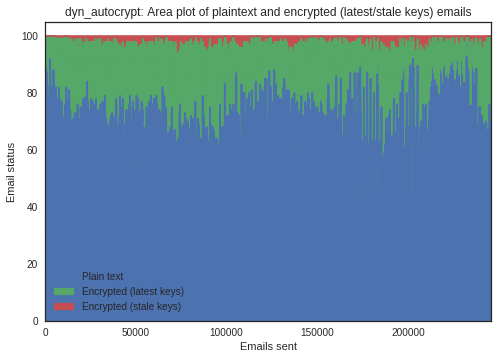

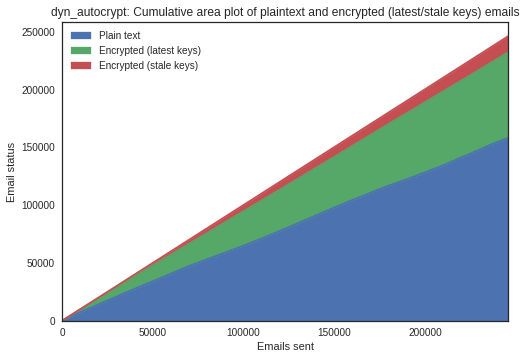

215400 97 1 2
215500 94 3 3
217300 93 2 5
226900 91 6 3
229800 91 5 4
229900 91 2 7
232000 97 2 1
232100 98 2 0
232200 100 0 0
232300 100 0 0
232400 100 0 0
232500 98 1 1
232600 98 1 1
232700 99 0 1
232900 96 3 1
233000 100 0 0
237600 91 5 4


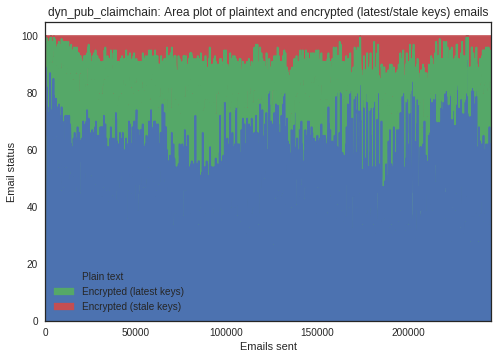

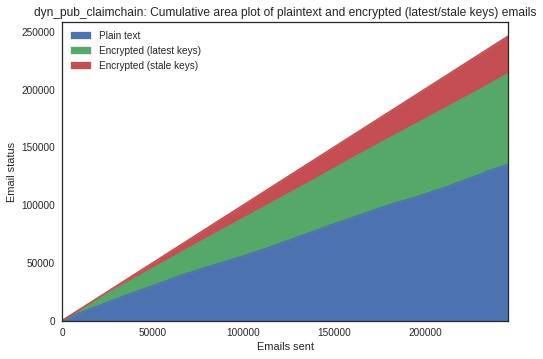

183000 92 7 1
202400 91 8 1
202600 92 8 0
205200 91 9 0
215400 97 2 1
215500 94 5 1
217300 96 2 2
217400 91 9 0
226900 91 6 3
229700 91 9 0
229800 91 7 2
229900 93 6 1
232000 97 2 1
232100 98 2 0
232200 100 0 0
232300 100 0 0
232400 100 0 0
232500 99 1 0
232600 98 2 0
232700 99 1 0
232900 96 4 0
233000 100 0 0
237600 94 6 0


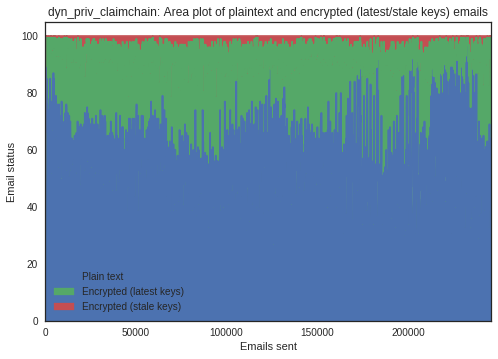

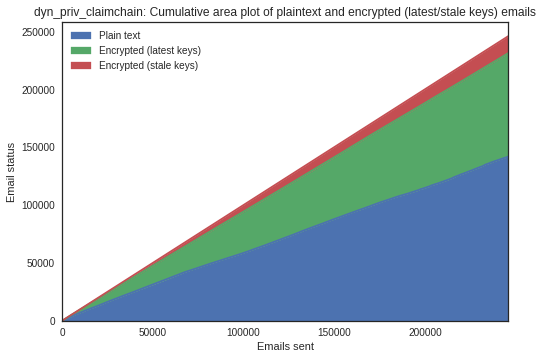

In [8]:
df_dict = {}
df_cumulative_dict = {}

for scenario in email_status.keys():
    df_dict[scenario] = pd.DataFrame(columns=('Plain text', 'Encrypted (latest keys)', 'Encrypted (stale keys)'))
    df_cumulative_dict[scenario] = pd.DataFrame(columns=('Plain text', 'Encrypted (latest keys)', 'Encrypted (stale keys)'))
    enc_status_counter = {}
    enc_status_cumulative_counter = {}
    for status in enc_status.values():
        enc_status_counter[status] = 0
        enc_status_cumulative_counter[status] = 0
    
    for index, email in enumerate(email_status[scenario]):
        enc_status_counter[enc_status[email]] += 1
        enc_status_cumulative_counter[enc_status[email]] += 1
            
        if index % 100 == 0:
            df_dict[scenario].loc[index] = [enc_status_counter["plaintext"], enc_status_counter["encrypted"], enc_status_counter["stale"]]
            df_cumulative_dict[scenario].loc[index] = [enc_status_cumulative_counter["plaintext"], enc_status_cumulative_counter["encrypted"], enc_status_cumulative_counter["stale"]]
            for status in enc_status.values():
                enc_status_counter[status] = 0
            
            if df_dict[scenario].loc[index][0] > 90:
                print("%s %s %s %s" % (index, df_dict[scenario].loc[index][0], df_dict[scenario].loc[index][1], df_dict[scenario].loc[index][2]))
                #for email in log[index-100:index]:
                #    recipients = email.To | email.Cc | email.Bcc - {email.From}
                #    print("From %s to %s" % (email.From, recipients))

    df_dict[scenario].plot.area()
    plt.title(scenario + ": Area plot of plaintext and encrypted (latest/stale keys) emails")
    plt.xlabel("Emails sent")
    plt.ylabel("Email status")

    df_cumulative_dict[scenario].plot.area()
    plt.title(scenario + ": Cumulative area plot of plaintext and encrypted (latest/stale keys) emails")
    plt.xlabel("Emails sent")
    plt.ylabel("Email status")

    plt.show()